# Power Density Data

A power density database has been provided by Wilmarth, Stimac and Ganefiantio for inclusion in this repository and the application. 

Maxwell Wilmarth, James Stimac and Gugi Ganefianto (2020) Power Density in Geothermal Fields, 2020 Update, Proceedings World Geothermal Congress 2020+1, Reykjavik, Iceland, April - October 2021.

Wilmarth, M. and Stimac, J.: Power Density In Geothermal Fields, Proceedings, World Geothermal Conference (2015).

Database paramaters

Power density is the power (MWe) per area (km2) that is generated. 

**Power capacity**

The Wilmarth et al (2020, 2015) database uses net power output in MWe that is based on published data or information provided by the operating company directly to the authors. This contrasts with installed capacity, which is typically publicly reported and is included in the [Think Geoenergy power plant map](https://www.thinkgeoenergy.com/map/). The gap between installed capacity and net generation may be related to plant efficiency or parasitic load. Alternatively, resource factors may influence, such as pressure decline or enthalpy evolution, that means that the power plant does not generate at full capacity.  

**Area**

Wilmarth et al (2020, 2015) use 500 m buffer around the production wells to define the reserver area. This is important to keep in mind when using the power density plot for resource capacity estimates: The power density values can not be blindly applied to the full extent of the resistivity anomaly or even an area defined by the maximum extent of geothermal manifestations. Instead, the area of productive resource in the subsurface must be defined using a conceptual model, ideally with each of the P10, P50 and P90 areas considered.    

**Average temperature**

Geothermal resources contain a range of temperatures in the subsurface, their production temperature/enthalpy may evolve though time, and reliable reporting of resource temperature may be difficult to obtain. It is therefore unsurprising that Wilmarth et al. (2020) cites average reservoir temperature as the most difficult parameter to estimate. 

## Notebook purpose

This notebook has been developed to explore the power density database and determine how best to plot the data in the Streamlit application. 


In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px


In [28]:
pddata = pd.read_excel(r'../PowerDensityDatabase_MWilmarth-JStimac-GGanefianto-2020-WGC-Data.xlsx', 
    sheet_name='Sheet1')
pddata


,Field,aveT_degC_2020,PwrDens_MWperkm2_2020,Tectonic_setting_WGC2020,System_type,Enthalpy
0,Ahuachapan,250,14.412513,Arc,Arc,Two-phase - liquid dominated
1,Alasehir,185,7.782423,NaN,NaN,Hot water - intermediate temperature
2,Amatitlán,285,7.692308,NaN,NaN,Two-phase - liquid dominated
3,Amedee,107,1.230769,Fault-based,Deep circulation,Hot water - low temperature
4,Bac-Man,269,10.204082,Arc,Arc,Two-phase - liquid dominated
...,...,...,...,...,...,...
103,Wineagle,110,0.538462,Fault-based,Deep circulation,Hot water - low temperature
104,Yamagawa,305,6.102604,Arc,Arc,Two-phase - liquid dominated
105,Yanaizu-Nishiyama,300,7.474571,Arc,Arc,Two-phase - liquid dominated
106,Yangbajain,175,3.007048,Other,NaN,Hot water - intermediate temperature


In [29]:
# fit a first order polynomial (strait line) to all the data
model_1d = np.poly1d(np.polyfit(pddata.aveT_degC_2020.values, pddata.PwrDens_MWperkm2_2020.values, 1))
x_1dpoly = np.linspace(0, 350, 200)
y_1dpoly = model_1d(x_1dpoly)

# fit a second order polynomial to all the data
model_2d = np.poly1d(np.polyfit(pddata.aveT_degC_2020.values, pddata.PwrDens_MWperkm2_2020.values, 2))
x_2dpoly = np.linspace(0, 350, 200)
y_2dpoly = model_2d(x_2dpoly)

Text(0.5, 1.0, 'Classification from Wallis 2021 database')

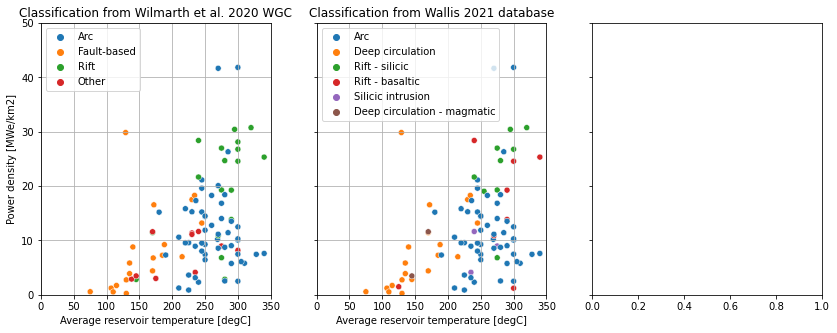

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(14,5), sharey=True)

ax = sns.scatterplot(x='aveT_degC_2020', y='PwrDens_MWperkm2_2020',
    hue='Tectonic_setting_WGC2020', 
    data=pddata,
    ax=ax1)

ax = sns.scatterplot(x='aveT_degC_2020', y='PwrDens_MWperkm2_2020',
    hue='System_type',
    data=pddata,
    ax=ax2)

ax3 = px.scatter(
    pddata, 
    x="aveT_degC_2020", 
    y="PwrDens_MWperkm2_2020",
    hover_data=['Field'],
)

'''
ax = sns.scatterplot(x='aveT_degC_2020', y='PwrDens_MWperkm2_2020',
    hue='Enthalpy',
    data=pddata,
    ax=ax3)
'''

#plt.plot(x_1dpoly, y_1dpoly, 
#    ':', color = 'tab:green', label = '1st order fit')
#plt.plot(x_2dpoly, y_2dpoly, 
#   '-', color = 'tab:green', label = '2nd order fit')

for ax in [ax1, ax2]:
    ax.legend()
    ax.grid()
    ax.set_xlim(0,350)
    ax.set_ylim(0,50)
    ax.set_xlabel('Average reservoir temperature [degC]')
    
ax1.set_ylabel('Power density [MWe/km2]')
ax1.set_title('Classification from Wilmarth et al. 2020 WGC')
ax2.set_title('Classification from Wallis 2021 database')


Fitting a trend line to this spread of data is not a good idea. An upper limit line would make more sense. 

Perhaps just present the raw data and point people to the Wilmarth et al (2020) paper for their interpretation. 

Things to do:
- Double check the publication for those points classified 'not on plot'. Have I just missed them?
- Then make a clickable plot for the streamlit app so we can see the field name
- Perhaps also make a pick list so that the plot only shows specific fields you want to look at ("my resource looks like these analogues, so please just show me these ones")

In [69]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, 
    cols=1,
    )


fig.append_trace(
    go.Scatter(
        x=pddata.aveT_degC_2020, 
        y=pddata.PwrDens_MWperkm2_2020,
        mode="markers+text",
        text=pddata.Field.values,
        textposition="bottom center",
        ),
    row=1, col=1
)

fig.update_layout(
    height=600, 
    width=600, 
    title_text="Plotly Subplots Test"
)

fig.show()

In [31]:
pddata.Tectonic_setting_WGC2020.unique()

array(['Arc', nan, 'Fault-based', 'Rift', 'Other'], dtype=object)

In [32]:
pddata_other = pddata[pddata.Tectonic_setting_WGC2020 == 'Other']


In [33]:
pddata_missing = pddata[pddata.Tectonic_setting_WGC2020 == 'Not on plot']
test = pddata_missing.sort_values(by=['aveT_degC_2020'])
test.head(11)

,Field,aveT_degC_2020,PwrDens_MWperkm2_2020,Tectonic_setting_WGC2020,System_type,Enthalpy


## New Classification System

There are many ways these fields may be split. This one is a proxy for spatial/temporal distance to heat source. 

- Volcanic – Arc andesite (Indonesia, Philippines) **V-andesite**
- Volcanic – Basaltic-dominant mature rift or hotspot (Iceland, Hawaii) **V-basalt**
- Volcanic – Silicic-dominant adolescent rift (NZ, Kenya etc) **V-rhyolite**
- Deep-circulation – magmatic (waning volcanic centres or deep sourced, magmatic heat in immature rifts and extensional provinces, Great Basin edge, West Branch of EARS) **DC-magmatic**
- Deep-circulation – amagmatic (extensional provinces with elevated heat flow, Great Basin) **DC-amagmatic**

First pass: Those that are not clearly in category just make **TBC**
